# Project part 1: Fast Food Marketing Campaign A/B Test

##  Raw data review and cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from functions_sandbox import cleaner

location = r"D:\IT_projects\Turing_Colledge\Modul2\Sprint2\project\fast_food_marketing\WA_Marketing-Campaign.csv"
fast_food = pd.read_csv(location)

In [3]:
fast_food.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
fast_food.tail(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29
547,10,Large,920,14,2,4,49.41


In [5]:
fast_food = cleaner(fast_food, info=True)
fast_food

All columns empty spaces have been stripped.
All columns names have been converted to lowercase.

Is there any duplicates?: False
Is there any NaN numbers?: False
Is there any empty cells?: False
Dataframe shape: (548, 7)


,marketid,marketsize,locationid,ageofstore,promotion,week,salesinthousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [6]:
fast_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marketid          548 non-null    int64  
 1   marketsize        548 non-null    object 
 2   locationid        548 non-null    int64  
 3   ageofstore        548 non-null    int64  
 4   promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   salesinthousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


## Exploratory Data Analysis

In [7]:
fast_food.describe().T

,count,mean,std,min,25%,50%,75%,max
marketid,548.0,5.715328,2.877001,1.00,3.000,6.0,8.0000,10.00
locationid,548.0,479.656934,287.973679,1.00,216.000,504.0,708.0000,920.00
ageofstore,548.0,8.503650,6.638345,1.00,4.000,7.0,12.0000,28.00
promotion,548.0,2.029197,0.810729,1.00,1.000,2.0,3.0000,3.00
week,548.0,2.500000,1.119055,1.00,1.750,2.5,3.2500,4.00
salesinthousands,548.0,53.466204,16.755216,17.34,42.545,50.2,60.4775,99.65


- Large sample size;

In [8]:
grouped_fast_food = fast_food.copy()
grouped_fast_food = grouped_fast_food.groupby(["promotion"]).agg(
    {"salesinthousands": ["count", "mean", "sum"]}
)
grouped_fast_food

salesinthousands                     
                     count       mean       sum
promotion                                      
1                      172  58.099012   9993.03
2                      188  47.329415   8897.93
3                      188  55.364468  10408.52

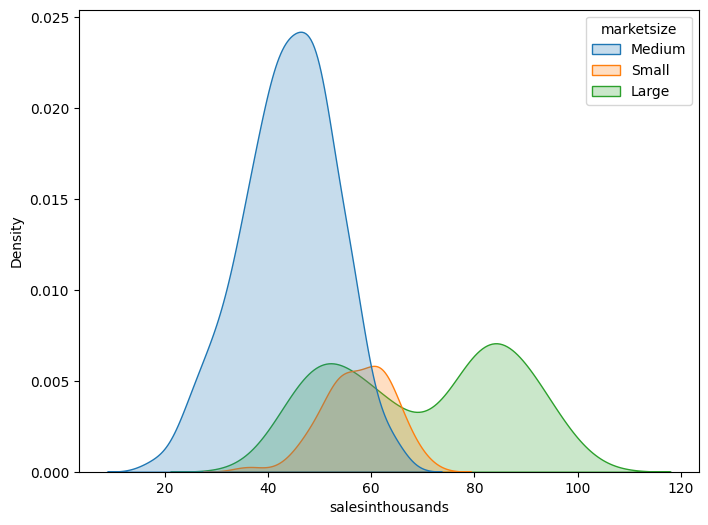

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=fast_food["salesinthousands"], hue=fast_food["marketsize"], fill=True)

plt.show()

In [32]:
prom1 = fast_food.loc[(fast_food["promotion"] == 1) & (fast_food["marketsize"] == "Medium"), "salesinthousands"]
prom2 = fast_food.loc[(fast_food["promotion"] == 2) & (fast_food["marketsize"] == "Medium"), "salesinthousands"]
prom3 = fast_food.loc[(fast_food["promotion"] == 3) & (fast_food["marketsize"] == "Medium"), "salesinthousands"]

Check if the data follows Normal distribution

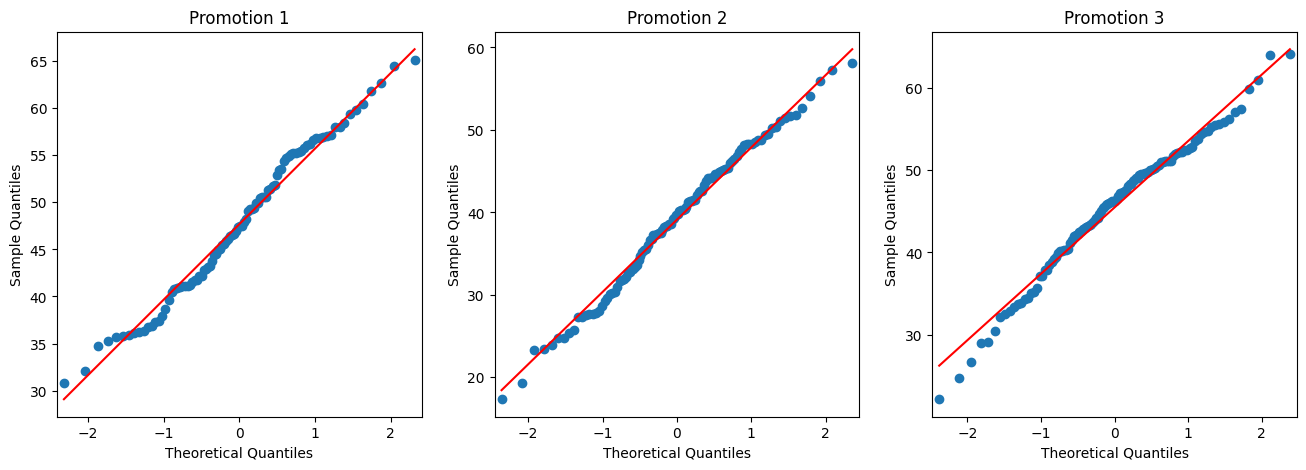

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
sm.qqplot(prom1, line="s", ax=ax[0])
sm.qqplot(prom2, line="s", ax=ax[1])
sm.qqplot(prom3, line="s", ax=ax[2])
ax[0].set_title("Promotion 1")
ax[1].set_title("Promotion 2")
ax[2].set_title("Promotion 3")

plt.show()

Is there difference between promotion 2 and promotion 3  
means of sales?

In [34]:
ttest = sm.stats.ttest_ind(prom2, prom3)
prom2_ci = st.norm.interval(
    0.95,
    loc=np.mean(prom2),
    scale=st.sem(prom2)
)
prom3_ci = st.norm.interval(
    0.95,
    loc=np.mean(prom3),
    scale=st.sem(prom3)
)
mean_diff = np.mean(prom2) - np.mean(prom3)
std_error_diff = np.sqrt(np.std(prom2)**2 / len(prom2) + (np.std(prom3)**2) / len(prom3))
prom2_3_diff_ci = st.norm.interval(
    0.95,
    loc=mean_diff,
    scale=std_error_diff
)
print(f"Means of promotion 2 and 3 respectively: {prom2.mean(), prom3.mean()}")
print(f"Returned data of t-statistic, p-value, degrees of freedom: {ttest}")
print(prom2_ci, prom3_ci)
print(prom2_3_diff_ci)

Means of promotion 2 and 3 respectively: (39.11435185185184, 45.46887931034483)
Returned data of t-statistic, p-value, degrees of freedom: (-5.627926077289609, 5.4705188612907746e-08, 222.0)
(37.45329584044109, 40.77540786326259) (43.99642796907403, 46.94133065161564)
(-8.564274527467292, -4.144780389518685)


Because p-value is < than 0.05, we must to reject H0 hypothesis which means that there is significant difference between sales of promotion 2 versus 3.  
Based on these results, it appears that Promotion 3 has significantly higher mean sales compared to Promotion 2. The negative value for the difference in means indicates that, on average, Promotion 2 has lower sales than Promotion 3. This is also consistent with the results of the t-test, which shows a significant difference between the two promotions.

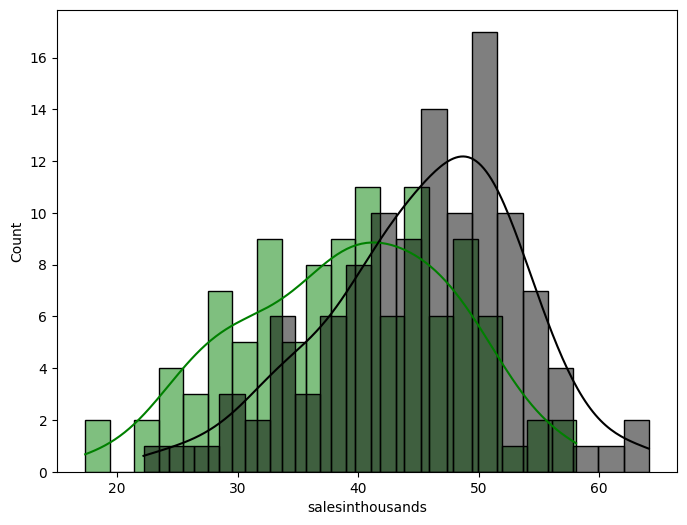

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(x=prom2, color="green", label="promotion2", bins=20, kde=True)
sns.histplot(x=prom3, color="black", label="promotion3", bins=20, kde=True)

plt.show()